
<img src="tpan1.png">



*****

## Exercice 1:<h2>
>On considère le polynôme $p(x) = (x - 1)^6$. 
>
>En développant on
>peut écrire ce même polynôme sous la forme
>$f(x) = x^6 - 6x^5 + 15x^4 - 20x^3 + 15x^2 - 6x + 1.$
>
>1) Avec Matlab évaluer $p(x)$ et $f(x)$ pour $x$ allant de $.998$ à
>$1.002$ en choisissant des pas de $.0001$.
>
>2) Faire un graphique de $f(x)$ et $p(x)$. Commenter.

In [1]:
function x = horner(a,z_0)
n = length(a);
result = a(1);
for j = 2:n
    result = result*z_0 + a(j);
endfor
x = result;
end

In [4]:
p=@(x) (x-1).^6
f=@(x) x.^6 - 6*x.^5 + 15*x.^4 - 20*x.^3 + 15*x.^2 - 6*x + 1

p =

@(x) (x - 1) .^ 6

f =

@(x) x .^ 6 - 6 * x .^ 5 + 15 * x .^ 4 - 20 * x .^ 3 + 15 * x .^ 2 - 6 * x + 1



In [6]:
T=[1 -6 15 -20 15 -6 1]
% Expression réduite
disp('-------p(i)---------')
for i=[0.998:0.001:1.002]
p(i)
endfor
%expression developpée
disp('-------f(i)----------')
for i=[0.998:0.001:1.002]
f(i)
endfor
disp('-------horner--------')
for i=[0.998:0.001:1.002]
horner(T,i)
endfor

T =

    1   -6   15  -20   15   -6    1

-------p(i)---------
ans =    6.4000e-17
ans =    1.0000e-18
ans = 0
ans =    1.0000e-18
ans =    6.4000e-17
-------f(i)----------
ans =    1.7764e-15
ans = 0
ans = 0
ans =    8.8818e-16
ans =   -1.7764e-15
-------horner--------
ans =   -1.3323e-15
ans =   -2.2204e-15
ans = 0
ans =   -6.6613e-16
ans =   -6.6613e-16


#### 2)  un graphique de $f(x)$ et $p(x)$.

In [ ]:
x=[0.998:0.0001:1.002]
plot(x,f(x),'r',x,p(x),'b*')
title ("solution dans [0.998:0.0001:1.002] ");
xlabel ("x");
ylabel ("f(x)");
grid on

# Avec python

Matplotlib is building the font cache; this may take a moment.


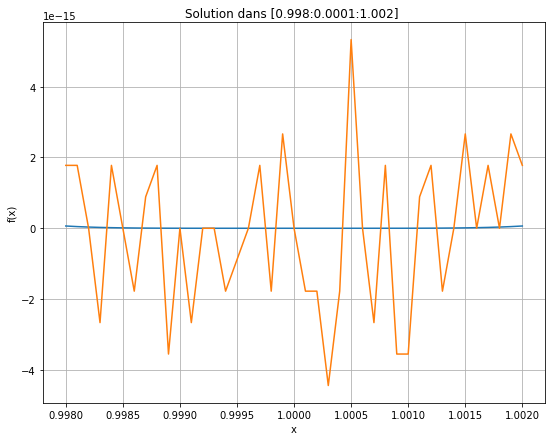

In [18]:
import matplotlib.pyplot as plt
import numpy as np

'x=np.linspace(0.998, 1.002,100)'
x = np.arange(0.998, 1.002, 0.0001) 
p1 = lambda x:(x-1)**6 
fig = plt.figure(1, figsize=(9, 7))
plt.plot(x,p1(x))

P2 = lambda x: x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1
plt.plot(x,P2(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Solution dans [0.998:0.0001:1.002] ')
plt.grid(True)   
plt.show()

## Expliquer ces sources d'erreurs !

# EXERCICE 2:

>On considère l'équation : $$ f(x)=x^3+x^2-3x-3=0$$
>1) Dessiner la courbe de $f$ dans l'intervalle $[-2;2]$, puis trouver des intervalles convenables pour appliquer la méthode de >bisection.
>
>2) Utiliser un programme `dicho.m` qui permettra de trouver les solutions de l'équation $f(x)=0$ avec $eps=0.001$.
>
>3) Modifier le programme `dicho.m` pour qu'il donne le nombre d'itération nécessaire pour avoir la solution à $eps$ près.

In [ ]:
## 2.1
VERSION 1 PYTHON
``` python
def f(x):
    return x**3+x**2-3*x-3
``` 
version 2 PYTHON
``` python
f= lambda x:x**3+x**2-3*x-3
``` 

In [2]:
T=[-2:0.1:2];
TT=linspace(-2,2,41);# subdivision de [-2,2] en 40 subdivision ( 41 ponts)

f =

@(x) x .^ 3 + x .^ 2 - 3 * x - 3



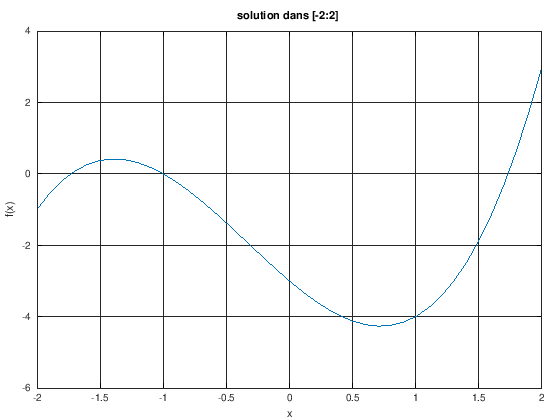

In [5]:
f=@(x) x.^3+x.^2-3*x-3 
t=[-2:0.1:2];# (2-(-2))/0.1+1 (b-a)/pas +1
plot(t,f(t))
title ("solution dans [-2:2] ");
xlabel ("x");
ylabel ("f(x)");
grid on

## Version Python

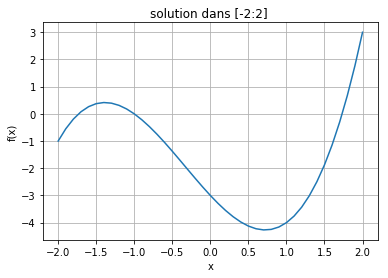

In [2]:
import matplotlib.pyplot as plt
from numpy import linspace
f=lambda x: x**3+x**2-3*x-3
T=linspace(-2,2,41)
plt.title("solution dans [-2:2] ");
plt.xlabel("x")
plt.ylabel ("f(x)")
plt.grid(True)
plt.plot(T,f(T))


# Daprés le graph de $f$ il existe 3 solutions :
- $\alpha_1 \in ]-2;-1.5[$ 
- $\alpha_2 \in ]-1.5;-0.5[$ 
- $\alpha_3 \in ]1.5;2[$ 

### 2) Donner la version python de `dicho`
les solutions de l'equation f(x)=0 avec eps=0.001

In [29]:
def dicho(a,b,f,n):
    m=(a+b)/2
    err=abs(b-a)
    while err>n:
        if m==0:
            break
        if f(a)*f(b)<0:
            b=m
        else:
            a=m
            m=(a+b)/2
            err=abs(b-a)
    return m   
    

In [26]:
f=lambda x: x**3+x**2-3*x-3
x3=dicho(-2,-1.5,f,10)
print('alpha 1 est égal à' + str(x3))

alpha 1 est égal à-1.75


In [27]:
x10=dicho(-1.5,-0.5,f,10)
x20=dicho(1.5,2,f,10)
print('alpha 2 est égal à ' + str(x10))
print('alpha 3 est égal à ' + str(x20))

alpha 2 est égal à -1.0
alpha 3 est égal à 1.75


verification : f($\alpha$))=0

In [33]:
print('f(x10)={}, f(x20)={}'.format(f(x10),f(x20)))

f(x10)=0.0002971846843138337,f(x20)=9.857414049463387e-07


3) fonction qui permet de renvoyer le nombre d'iteration du methode de dichotomie pour calculer la solution à 10^-p près

In [28]:
def dichow(a,b,f,eps):
    cp=0
    while (b-a)>eps:
        m=(a+b)/2
        if f(m)==0:
            return m
        if f(a)*f(m)<0 :
            b=m
        else :
            a=m
        cp+=1
    return m,cp

- $\alpha_1 \in ]-2;-1.5[$ 
- $\alpha_2 \in ]-1.5;-0.5[$ 
- $\alpha_3 \in ]1.5;2[$ 

In [30]:
f=lambda x: x**3+x**2-3*x-3
dichow(-2,-1.5,f,0.0001)

(-1.73199462890625, 13)

In [31]:
interval=[[-2,-1.5],[-1.5,-0.5],[1.5,2]]
for u in interval:
    print(dichow(u[0],u[1],f,10**(-3)))
################################################   
#print(dichow(-2,-1.5,f,10**(-3)))
#print(dichow(-1.5,-0.5,f,10**(-3)))
#print(dichow(1.5,2,f,10**(-3)))

(-1.7314453125, 9)
-1.0
(1.7314453125, 9)


Le nombre d'itération N nécéssaire à la méthode de la dichotomie pour trouver $\alpha$ à $10^{-p}$ prés 

$$N \geq E\left(\dfrac{\ln(b-a)+p\ln(10)}{\ln(2)}\right)+1$$

In [56]:

## Ecrire une fonction qui permet de renvoyer le nombre d'itération nécessaire à la méthode de dichotomie pour calculer
## la solution à 10^-p près
#ND=lambda p:.......


In [60]:
#alpha 1
dichow(-2,-1.5,f,10**(-5))
#à 10^-8

(-1.7320480346679688, 16)

In [67]:
#alpha 2
dichow(-1.51,-0.5,f,10**(-5))
#à 10^-8

(-0.9999990081787109, 17)

# EXERCICE 3:
>On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$
>1) Dessiner la courbe de $f$ dans l'intervalle $[1;2]$, puis trouver une valeur approché de la solution à 0.001 près (En >utilisant la fonction zoom du graphique).
>
>2) Vérifier que cette équation est équivalente aux 3 schéma du point fixe suivant:
>
>a) $g_1(x)=\frac{1}{2}\sqrt{10-x^3}=x$.
>
>b) $g_2(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.
>
>c) $g_3(x)=x-x^3-4x^2+10=x$.
>
>3) Ecrire puis appliquer  une fonction Matlab que l'on appellera  `pointfixe.m` aux trois schémas précédents en prenant >`x0=1.5;eps=0.001`.
>
>4) Quelle est la fonction (parmi $g_1, g_2$ et $g_3$) qui donne la convergence la plus rapide?
>

### Correction <h3>

#### 1)<h4>

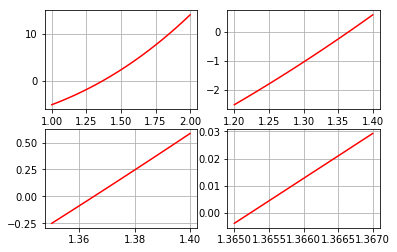

In [40]:
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import numpy as np 
import matplotlib.pyplot as plt

f=lambda x:x**3+4*x**2-10

t=np.linspace(1,2,100)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.2,1.4,100)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.35,1.4,100)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r')
plt.grid(True)
#########################################
t=np.linspace(1.365,1.367,100)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r')
plt.grid(True)


#### 2) Justification théorique pour la fonction g1

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$

a) $g(x)=\frac{1}{2}\sqrt{10-x^3}=x$.

 $$x^3+4x^2-10=0$$ 
    
 $$4x^2=10-x^3$$
 
 $$2x=\sqrt{10-x^3}$$
 
 $$x=\frac{1}{2}\sqrt{10-x^3}$$
 
Donc $ f(x)=g(x)$

## Calcul symbolique de la dérivée

In [63]:
from sympy import *
import numpy as np
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
g1=lambda x: 1/2*sqrt(10-x**3)


In [76]:
dg1=lambdify(x,diff(g1(x),x,1))
dg1(1.365)

### Que pouvez vous conclure à propos des convergences de g1

|g1(alpha)|<1 ==>g1 converge

## Justification théoriques pour g2 et g3

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$

b) $g(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.

$$x^3+4x^2-10=0$$
$$x^3+4x^2=10$$
$$x^2(x+4)=10$$
$$x^2=\frac{10}{x+4}$$
$$x=\sqrt{\displaystyle\frac{10}{4+x}}$$
Donc $ f(x)=g(x)$

## Etudier théoriquement la convergences de g2 et g3

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$
c) $g(x)=x-x^3-4x^2+10=x$.

$$x^3+4x^2-10=0$$
$$x^3+4x^2-10+x-x=0$$
$$x^3-4x^2+x-x=10$$
$$x^3-4x^2+x=x+10$$
$$4x^2+x=x-x^3+10$$
$$x=x-x^3-4x^2+10$$
Donc $ f(x)=g(x)$

In [33]:
from sympy import *
import numpy as np
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
g3=lambda x: x-x**3-4*x**2+10


In [34]:
dg3=lambdify(x,diff(g3(x),x,1))
dg3(1.365)

==> valeur absolue de la dérivée de g3($\alpha$) > 1 donc g3 diverge ¶


### Méthode numérique avec Python

In [35]:
from numpy import sqrt 
f=lambda x:  x**3+4*x**2-10 # la fonction f
g1=lambda x: 1/2*sqrt(10-x**3)
g2=lambda x: sqrt(10/(x+4))
g3=lambda x: x-x**3-4*x**2 + 10


def ptfixe(g,x0,eps,nmax):
    zero=x0
    for i in range(nmax):
        x=zero 
        zero=g(x)
        erreur=abs(zero-x)
        print(zero)
        if erreur<eps:
            return zero,i
    print('pas de convergence avec le nombre d''iteration indique')

In [36]:
ptfixe(g1,1.5,0.001,50)


1.286953767623375
1.4025408035395783
1.3454583740232942
1.3751702528160383
1.360094192761733
1.3678469675921328
1.3638870038840212
1.36591673339004
1.364878217193677
1.365410061169957


In [37]:
ptfixe(g2,1.5,0.001,50)


1.348399724926484
1.3673763719912828
1.364957015402487
1.3652647481134421


In [38]:
ptfixe(g3,1.5,0.001,50)


-0.875
6.732421875
-469.72001200169325
102754555.18738511
-1.0849338705317464e+24
1.277055591444378e+72
-2.082712908581025e+216


OverflowError: (34, 'Result too large')

#### 4)<h4>

### Donner la solution avec un codepython 


In [94]:
f=lambda x:  x**3+4*x**2-10 # la fonction f
g1=lambda x: 1/2*sqrt(10-x**3)
g2=lambda x: sqrt(10/(x+4))
g3=lambda x: x-x**3-4*x**2 + 10


def ptfixe(g,x0,eps,nmax):
    pass





    print('pas de convergence avec le nombre d''iteration indique')



In [ ]:
ptfixe(g3,1.5,0.0001,30)

### quelle est la fonction qui donne la convergence la plus rapide ??

Donner le nombre d'itération pour chaque méthode convergent e
+ $g_2$ donne le resultat en ? itérations 
+ $g_1$ donne le resultat en ?
+ $g_3$ est - elle convergente?

$g_2$ donne le resultat en 4 itérations seulement alors que
$g_1$ donne le resultat en 10 itérations
$g_3$ n'est pas convergente

# EXERCICE 4:
>1) On considère la fonction $f(x)=e^{-x}-x$. Ecrire puis appliquer  une fonction Matlab que l'on appellera `newton.m` à la >fonction $f$, en prenant $x0=0$, $eps=0.001$ .
>
>2) Montrer que l'équation $f(x)=0$ admet une solution unique que l'on peut obtenir en utilisant la méthode de Newton à partir >de $x0=1$.

### Correction Python

#### 1) <h4>

In [46]:
def newton(f,fprime,a,eps):
    x1=a
    x2=x1-(f(x1)/fprime(x1))
    while abs(x1-x2)>eps :
        x1=x2
        x2=x1-(f(x1)/fprime(x1))
        m=x2
    return m

On considère la fonction $f(x)=e^{-x}-x$. resultat de l'algorithme newton.m à la >fonction $f$, en prenant $x0=0$, $eps=0.001$¶


In [47]:
import math
from sympy import *
from sympy.abc import x

f=lambda x: math.exp(-x)-x
fprime=lambda x: -math.exp(-x)-1
newton(f,fprime,0,0.001)

In [48]:
newton(f,fprime,1,0.001)